In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal, scipy.optimize, scipy.integrate
import yt
# yt.set_log_level(50)
from scipy.fft import fftn

In [2]:
ts = yt.load('hydro_plt*')
# ds = ts[-1]

In [3]:
rho = np.zeros((len(ts), 32, 32, 32))
phi = np.zeros((len(ts), 32, 32, 32))
v_s = np.zeros((len(ts), 3, 32, 32, 32))
P = np.zeros((len(ts), 32, 32, 32))

for i in range(len(ts)):
    ds = ts[i]
    ad = ds.all_data()

    rho[i] = ad[('boxlib','rho')].reshape((32, 32, 32))
    phi[i] = ad[('boxlib','phi')].reshape((32, 32, 32))
    v_s[i, 0] = ad[('boxlib','ux')].reshape((32, 32, 32))
    v_s[i, 1] = ad[('boxlib','uy')].reshape((32, 32, 32))
    v_s[i, 2] = ad[('boxlib','uz')].reshape((32, 32, 32))

    P[i] = ad[('boxlib','p_bulk')].reshape((32, 32, 32))

yt : [INFO     ] 2024-06-20 13:50:16,218 Parameters: current_time              = 0.0
yt : [INFO     ] 2024-06-20 13:50:16,218 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2024-06-20 13:50:16,219 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2024-06-20 13:50:16,220 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2024-06-20 13:50:16,351 Parameters: current_time              = 100.0
yt : [INFO     ] 2024-06-20 13:50:16,351 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2024-06-20 13:50:16,352 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2024-06-20 13:50:16,353 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2024-06-20 13:50:16,511 Parameters: current_time              = 200.0
yt : [INFO     ] 2024-06-20 13:50:16,512 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2024-06-20 13:50:16,512 Parameters: domain_left_edge          = [0. 0. 0.]
yt : 

Text(0.5, 1.0, '$\\phi$')

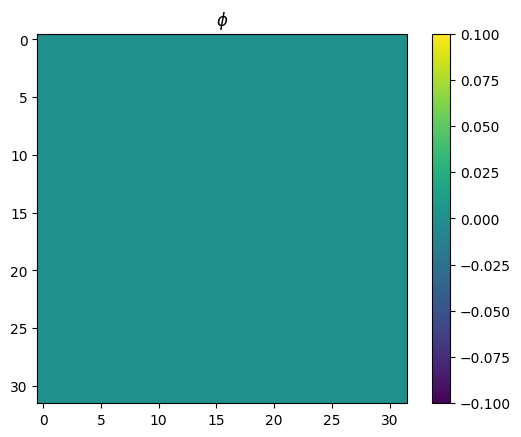

In [4]:
plt.imshow(phi[-1, :, 16, :])
plt.colorbar()
plt.title(r"$\phi$")

In [5]:
S_rho = np.zeros((32, 32, 32), dtype = complex)
S_v = np.zeros((32, 32, 32), dtype = complex)

for i in range(len(ts)):
    r1 = rho[i]
    r_k1 = fftn(r1)
    S_rho += r_k1*np.conj(r_k1)

S_rho /= (len(ts)*(32**3)*1e-7)
S_rho = np.abs(S_rho)

Text(0.5, 1.0, '$S_{\\rho \\rho}$')

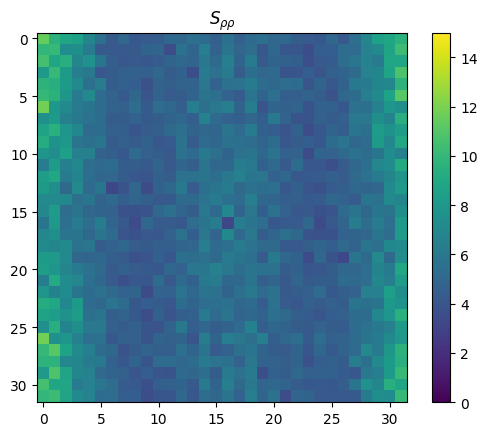

In [6]:
plt.imshow(S_rho[:, 16, :], vmin = 0, vmax = 15)
plt.colorbar()
plt.title(r"$S_{\rho \rho}$")

In [7]:
S_v = np.zeros((3, 3, 32, 32, 32), dtype = complex)

for i in range(len(ts)):
    for j in range(3):
        for k in range(3):
            r1 = v_s[i, j]
            r_k1 = fftn(r1)
            r2 = v_s[i, k]
            r_k2 = fftn(r2)
            S_v[j, k] += r_k1*np.conj(r_k2)

S_v /= (len(ts)*(32**3)*1e-7)
S_v = np.abs(S_v)

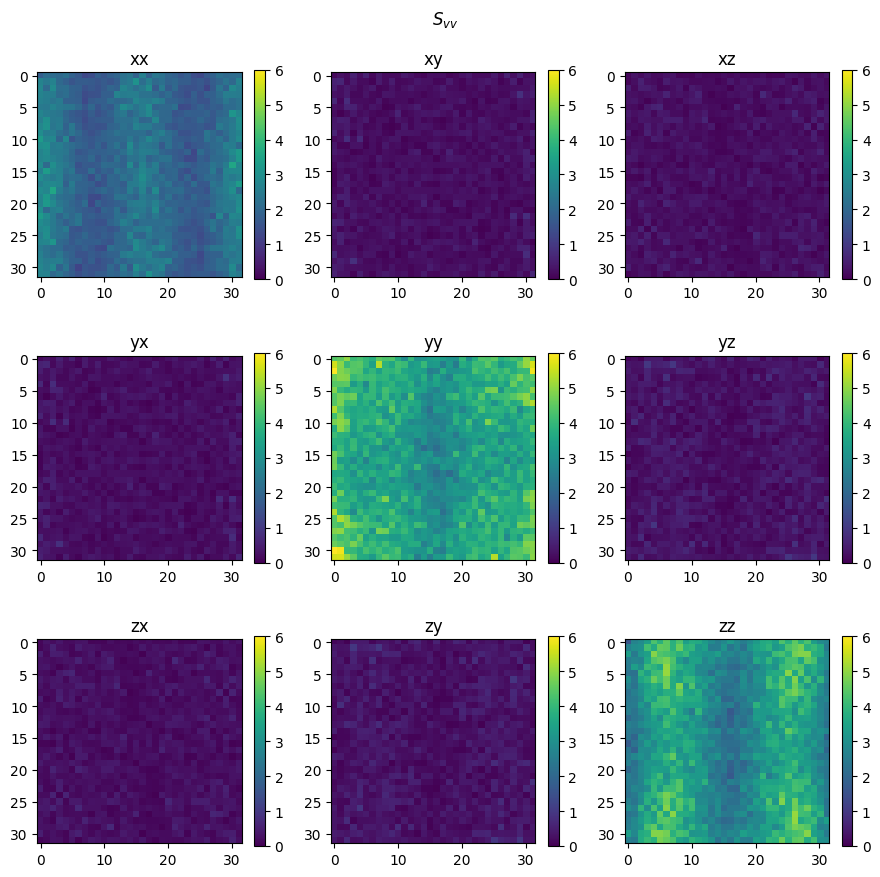

In [8]:
fig, axs = plt.subplots(3, 3, figsize = (9, 9))

for i in range(3):
    for j in range(3):
        ax = axs[i, j]

        im = ax.imshow(S_v[i, j, :, 16, :], vmin = 0, vmax = 6)
        fig.colorbar(im, ax=ax, orientation='vertical', shrink = 0.8) 
        ax.set_title(f"{chr(120 + i)}{chr(120 + j)}")

fig.suptitle(r"$S_{vv}$")
fig.tight_layout()

Text(0, 0.5, 'Counts')

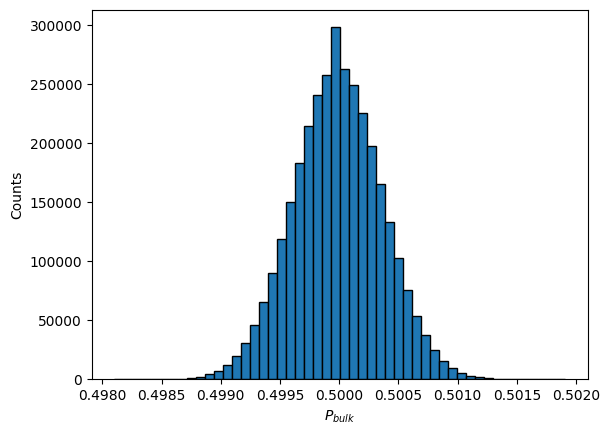

In [9]:
freq, bins, patches = plt.hist(P.flatten(), edgecolor = "k", bins = 50)
plt.xlabel(r"$P_{bulk}$")
plt.ylabel("Counts")

In [10]:
# ds.field_info

In [11]:
f_dist = np.zeros((101, 19, 32, 32, 32))

ts = yt.load('f_plt*')

for i in range(101):
    ds = ts[i]
    ad = ds.all_data()
    for j in range(19):
        f_dist[i, j] = ad[('boxlib',f'e{j}')].reshape((32, 32, 32))

yt : [INFO     ] 2024-06-20 13:50:31,325 Parameters: current_time              = 0.0
yt : [INFO     ] 2024-06-20 13:50:31,326 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2024-06-20 13:50:31,327 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2024-06-20 13:50:31,327 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2024-06-20 13:50:31,438 Parameters: current_time              = 100.0
yt : [INFO     ] 2024-06-20 13:50:31,439 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2024-06-20 13:50:31,439 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2024-06-20 13:50:31,440 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2024-06-20 13:50:31,550 Parameters: current_time              = 200.0
yt : [INFO     ] 2024-06-20 13:50:31,550 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2024-06-20 13:50:31,551 Parameters: domain_left_edge          = [0. 0. 0.]
yt : 

In [12]:
g_dist = np.zeros((101, 19, 32, 32, 32))

ts = yt.load('g_plt*')

for i in range(101):
    ds = ts[i]
    ad = ds.all_data()
    for j in range(19):
        g_dist[i, j] = ad[('boxlib',f'e{j}')].reshape((32, 32, 32))

yt : [INFO     ] 2024-06-20 13:50:44,109 Parameters: current_time              = 0.0
yt : [INFO     ] 2024-06-20 13:50:44,109 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2024-06-20 13:50:44,110 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2024-06-20 13:50:44,111 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2024-06-20 13:50:44,225 Parameters: current_time              = 100.0
yt : [INFO     ] 2024-06-20 13:50:44,225 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2024-06-20 13:50:44,226 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2024-06-20 13:50:44,226 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2024-06-20 13:50:44,344 Parameters: current_time              = 200.0
yt : [INFO     ] 2024-06-20 13:50:44,345 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2024-06-20 13:50:44,346 Parameters: domain_left_edge          = [0. 0. 0.]
yt : 

In [13]:
f_dist_test = np.mean(f_dist, axis = (2, 3, 4))
g_dist_test = np.mean(g_dist, axis = (2, 3, 4))

f_dist_expand = np.zeros((101, 19, 19))
g_dist_expand = np.zeros_like(f_dist_expand)

for i in range(101):
    f = f_dist_test[i]
    f_dist_expand[i] = f[:, np.newaxis] * f[np.newaxis, :]

    g = g_dist_test[i]
    g_dist_expand[i] = g[:, np.newaxis] * g[np.newaxis, :]

/tmp/ipykernel_377394/3965852337.py:12: RuntimeWarning: overflow encountered in multiply
  g_dist_expand[i] = g[:, np.newaxis] * g[np.newaxis, :]


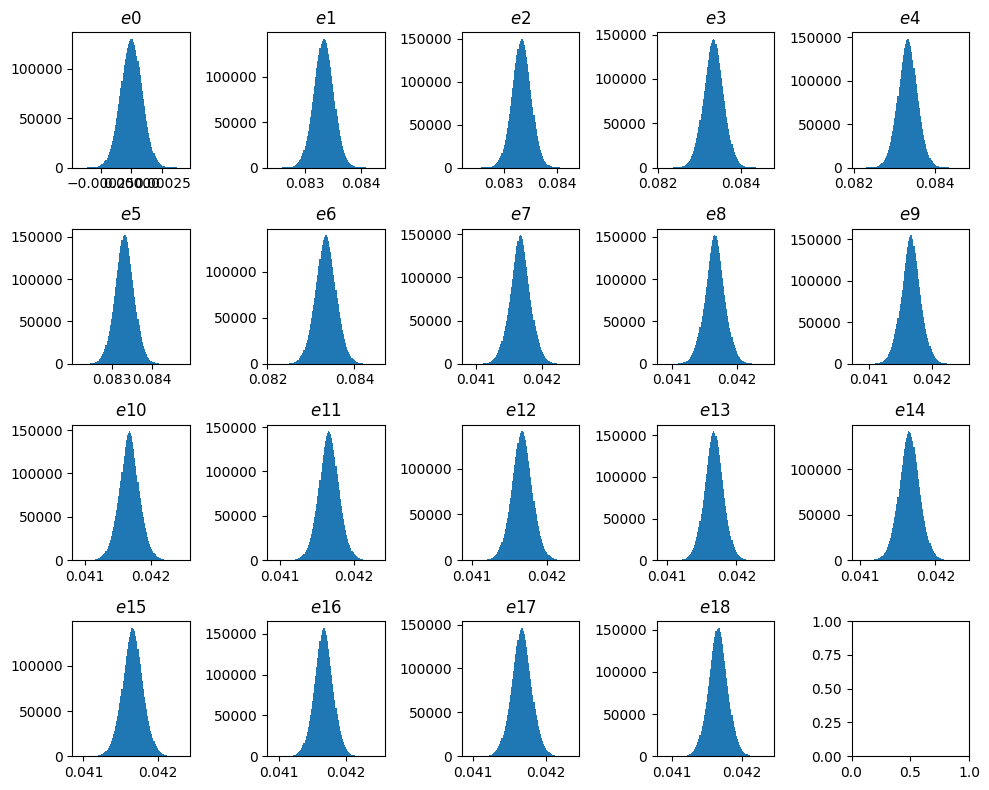

In [14]:
fig, axs = plt.subplots(4, 5, figsize = (10, 8))

axs = axs.flatten()

for i in range(19):
    # for j in range(19):
        ax = axs[i]
        
        vals = f_dist[1:, i].flatten()
        ax.hist(vals, bins = 100)

        ax.set_title(f"$e{i}$")

fig.tight_layout()

Index 0 failed
Index 1 failed
Index 2 failed
Index 3 failed
Index 4 failed
Index 7 failed
Index 8 failed
Index 9 failed
Index 10 failed


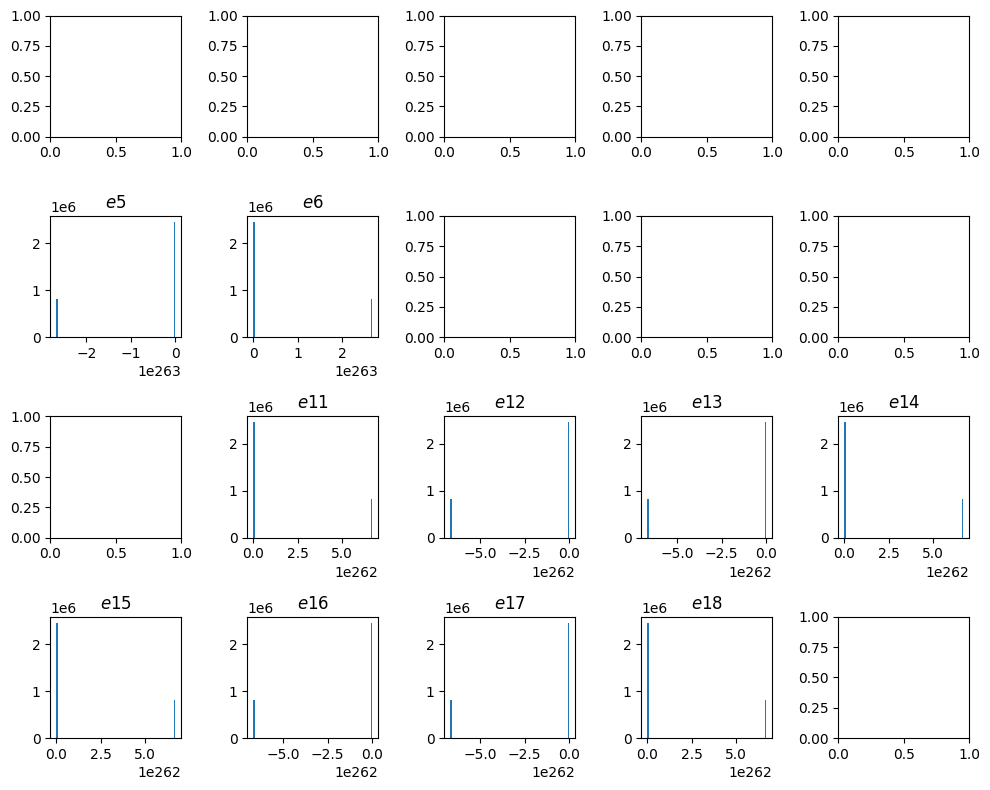

In [17]:
fig, axs = plt.subplots(4, 5, figsize = (10, 8))

axs = axs.flatten()

for i in range(19):
    # for j in range(19):
        ax = axs[i]
        
        vals = g_dist[1:, i].flatten()
        try:
            ax.hist(vals, bins = 100)
            ax.set_title(f"$e{i}$")
        except IndexError:
            print(f"Index {i} failed")

fig.tight_layout()